<a href="https://colab.research.google.com/github/hardeybisey/cov_thesis/blob/main/COVthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA DICTIONARY

* REASON: REASON FOR DISCHARGE.
* AGE: AGE.
* GENDER: PATIENTS GENDER.
* MARSTAT: MARITAL STATUS.
* EDUC: EDUCATION.
* EMPLOY:EMPLOYMENT STATUS.
* VET: VETERAN STATUS.
* LIVARAG: LIVING ARRANGEMENTS.
* ARRESTS: NUMBER OF ARRESTS IN 30 DAYS PRIOR TO ADMISSION.
* REGION: CENSUS REGION,
* METHUSE: This field identifies whether the use of Methadone or Buprenorphine is part of the client's treatment plan.
* DAYWAIT: Indicates the number of days from the first contact or request for service until the client was admitted and the first clinical service was provided.
* LOS: LENGTH OF STAY
* PSOURCE: PRINCIPAL SOURCE OF REFERRAL.
* SUB1: TYPE OF SUBTANCE (PRIMARY).
* ROUTE1: USUAL ROUTE OF ADMINISTRATION (PRIMARY).
* FREQ1: FREQUENCY OF USE (PRIMARY).
* FRSTUSE1: AGE AT FIRST USE.
* PSYPROB: Indicates whether the client has a psychiatric problem in addition to his or her alcohol or drug use problem.,
* HLTHINS : Specifies the client's health insurance (if any). The insurance may or may not cover alcohol or drug treatment.
* ALCDRUG: SUBSTANCE ABUSE TYPE.

**FOCUS OF THIS RESEARCH : Black/African American with no prior treatment episode**


# **STEPS:** 
* 1) Taking out the substet(RACE:Black/African American) from the dataset.
* 2) Taking out another substet(NOPRIOR: NO PRIOR TREATMENT EPISODES) from the dataset.
* 3) Define target variable.
* 4) Define the Predictors. 
* 5) Delete variables with missing values > 33%.
* 6) Drop rows with missing values.
* 7) Recategorise the categorical Variables.
* 8) Perform EDA on the predictors based on the target variable.
* 9) Encode Categorical Variables for machine learning.
* 10) Vallidate the best ML Model.

**Note:** SUB1: Primary substance abuse type of patient 

RESEARCH OBJECTIVES:
1) Identify a machine learning model that performs best in identifying the outcome of a SUD treatment.
2) Identify factors having greater influence in the outcome of a SUD treatment.
3) what are the

RESEARCH QUESTIONS:

1) There is no significant relationship between Type of drugs used and Treatment Success
2) There is no significant relationship between Sociodemographic factors(GENDER,AGE,EDUCATION,MARITAL STATUS)and Treatment Success 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('/Users/hardey/Desktop/COV Thesis/Data/data.csv')
df.head(3)

,Unnamed: 0,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,...,ROUTE2,FREQ2,FRSTUSE2,SUB3,ROUTE3,FREQ3,FRSTUSE3,ALCDRUG,PSYPROB,HLTHINS
0,1,(5) 21-24,(1) MALE,(5) WHITE,(5) NOT OF HISPANIC ORIGIN,(1) NEVER MARRIED,(2) 9-11,(2) PART TIME,(2) NO,(3) INDEPENDENT LIVING,...,(1) ORAL,(2) 1-3 TIMES IN THE PAST MONTH,(3) 15-17,(1) NONE,NaN,NaN,NaN,(3) ALCOHOL AND OTHER DRUGS,NaN,NaN
1,2,(4) 18-20,(2) FEMALE,(5) WHITE,(5) NOT OF HISPANIC ORIGIN,(1) NEVER MARRIED,(1) 8 YEARS OR LESS,(3) UNEMPLOYED,(2) NO,(3) INDEPENDENT LIVING,...,(2) SMOKING,(3) 1-2 TIMES IN THE PAST WEEK,(2) 12-14,(1) NONE,NaN,NaN,NaN,(3) ALCOHOL AND OTHER DRUGS,(2) NO,NaN
2,3,(11) 50-54,(1) MALE,(5) WHITE,(5) NOT OF HISPANIC ORIGIN,(3) SEPARATED,(4) 13-15,(4) NOT IN LABOR FORCE,(2) NO,(3) INDEPENDENT LIVING,...,(1) ORAL,(2) 1-3 TIMES IN THE PAST MONTH,(11) 50-54,(2) ALCOHOL,(1) ORAL,(4) 3-6 TIMES IN THE PAST WEEK,(3) 15-17,(3) ALCOHOL AND OTHER DRUGS,(2) NO,NaN


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'AGE', 'GENDER', 'RACE', 'ETHNIC', 'MARSTAT', 'EDUC',
       'EMPLOY', 'VET', 'LIVARAG', 'ARRESTS', 'STFIPS', 'REGION', 'METHUSE',
       'DAYWAIT', 'REASON', 'LOS', 'PSOURCE', 'NOPRIOR', 'SUB1', 'ROUTE1',
       'FREQ1', 'FRSTUSE1', 'SUB2', 'ROUTE2', 'FREQ2', 'FRSTUSE2', 'SUB3',
       'ROUTE3', 'FREQ3', 'FRSTUSE3', 'ALCDRUG', 'PSYPROB', 'HLTHINS'],
      dtype='object')

In [ ]:
df['REASON'].unique()

array(['(3) TERMINATED BY FACILITY', '(5) INCARCERATED',
       '(1) TREATMENT COMPLETED', '(2) LEFT AGAINST PROFESSIONAL ADVICE',
       '(4) TRANSFERRED TO ANOTHER TREATMENT PROGRAM OR FACILITY',
       '(7) OTHER', '(6) DEATH', nan], dtype=object)

In [ ]:
df['NOPRIOR'].unique()

array(['(2) 2 PRIOR TREATMENT EPISODES', '(3) 3 PRIOR TREATMENT EPISODES',
       '(0) NO PRIOR TREATMENT EPISODES',
       '(1) 1 PRIOR TREATMENT EPISODES',
       '(5) 5 OR MORE PRIOR TREATMENT EPISODES', nan,
       '(4) 4 PRIOR TREATMENT EPISODES'], dtype=object)

In [ ]:
df['AGE'].unique()

array(['(5) 21-24', '(4) 18-20', '(11) 50-54', '(6) 25-29', '(9) 40-44',
       '(8) 35-39', '(12) 55 AND OVER', '(10) 45-49', '(7) 30-34',
       '(3) 15-17', '(2) 12-14'], dtype=object)

In [ ]:
new_df = df[(df['RACE']=='(4) BLACK OR AFRICAN AMERICAN') & (df['NOPRIOR']=='(0) NO PRIOR TREATMENT EPISODES')].reset_index(drop=True)
new_df.drop(['SUB2','ROUTE2','FREQ2','FRSTUSE2','SUB3','ROUTE3','FREQ3','FRSTUSE3','NOPRIOR','ETHNIC','RACE','STFIPS','Unnamed: 0'],axis=1, inplace=True)

In [ ]:
new_df.shape

(125767, 21)

# Check the percentage of missing values for each column

In [ ]:
missing = {}
for col in new_df.columns:
    missing[col] = round((new_df[col].isna().sum()/len(new_df[col]))*100,2)
missing_value = pd.DataFrame({'Column':missing.keys(),'Missing %':missing.values()}).sort_values(by='Missing %',ascending=False)
missing_value.head(10)

,Column,Missing %
20,HLTHINS,59.45
10,DAYWAIT,42.78
19,PSYPROB,16.21
2,MARSTAT,13.10
5,VET,10.36
9,METHUSE,5.45
17,FRSTUSE1,2.74
16,FREQ1,2.39
13,PSOURCE,1.74
15,ROUTE1,1.64


**Drop the `HLTHINS` and `DAYWAIT` columns as they have missing values > 33%**

In [ ]:
new_df.drop(['HLTHINS','DAYWAIT'], axis =1, inplace = True)
new_df.dropna(inplace=True)

In [ ]:
new_df.shape

(77606, 19)

# Data preprocessing

In [ ]:
for col in new_df.columns:
    if new_df[col].dtype == 'float64':
        continue
    new_df[col] = new_df[col].str.lstrip('0123456789()')
    new_df[col] = new_df[col].str.strip()

In [ ]:
new_df.head(3)

,AGE,GENDER,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,ARRESTS,REGION,METHUSE,REASON,LOS,PSOURCE,SUB1,ROUTE1,FREQ1,FRSTUSE1,ALCDRUG,PSYPROB
1,40-44,MALE,"DIVORCED, WIDOWED",8 YEARS OR LESS,UNEMPLOYED,NO,DEPENDENT LIVING,NONE,MIDWEST,NO,OTHER,32.0,COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI,ALCOHOL,ORAL,DAILY,11 AND UNDER,ALCOHOL AND OTHER DRUGS,NO
2,45-49,MALE,"DIVORCED, WIDOWED",12,NOT IN LABOR FORCE,NO,DEPENDENT LIVING,NONE,MIDWEST,NO,TRANSFERRED TO ANOTHER TREATMENT PROGRAM OR FA...,31.0,COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI,COCAINE/CRACK,SMOKING,DAILY,25-29,ALCOHOL AND OTHER DRUGS,NO
4,35-39,MALE,SEPARATED,12,UNEMPLOYED,NO,DEPENDENT LIVING,NONE,MIDWEST,NO,TERMINATED BY FACILITY,35.0,INDIVIDUAL (INCLUDES SELF-REFERRAL),HEROIN,INHALATION,DAILY,15-17,OTHER DRUGS ONLY,YES


In [ ]:
unique = {}
for col in new_df.columns:
    if new_df[col].dtype == 'float64':
        pass
    else:
        unique[col] = new_df[col].unique()

**Recategorizing the categorical variables**

In [ ]:
education = {'8 YEARS OR LESS':'8th GRADE & LESS',
             '9-11':'9TH GRADE',
             '12':'12th GRADE',
             '13-15':'ASSOCIATE DEGREE',
             '16 OR MORE': 'BACHELOR DEGREE & HIGHER'}
route = ['ORAL','SMOKING', 'INHALATION','OTHER','INJECTION (IV OR INTRAMUSCULAR)']
reason = ['TREATMENT COMPLETED']
past_30_days_use = {'DAILY':'DAILY',
                    'NO USE IN THE PAST MONTH': 'NOT IN THE PAST MONTH',
                    '1-3 TIMES IN THE PAST MONTH': '1-3 TIMES PAST MONTH',
                    '3-6 TIMES IN THE PAST WEEK':'3-6 TIMES PAST WEEK',
                    '1-2 TIMES IN THE PAST WEEK':'1-2 TIMES PAST WEEK'}
referral = {'INDIVIDUAL (INCLUDES SELF-REFERRAL)':'SELF',
       'COURT / CRIMINAL JUSTICE REFERRAL / DUI/DWI':'COURT',
       'OTHER COMMUNITY REFERRAL':'COMMUNITY REFERRAL',
       'OTHER HEALTH CARE PROVIDER':'HEALTH CARE',
       'ALCOHOL/DRUG ABUSE CARE PROVIDER':'ALCOHOL/DRUG ABUSE CARE', 
       'SCHOOL (EDUCATIONAL)':'SCHOOL',
       'EMPLOYER/EAP':'EMPLOYER'}
arrests = {'NONE':'0',
           'ONCE':'1',
           '2 OR MORE TIMES':'2 OR MORE'}
subtance = {'OTHER DRUGS ONLY':'DRUGS',
              'ALCOHOL AND OTHER DRUGS':'ALCOHOL AND DRUGS',
              'ALCOHOL ONLY':'ALCOHOL'}

In [ ]:
def subtance_type(x):
    subtances = ['ALCOHOL','COCAINE/CRACK','MARIJUANA/HASHISH','HEROIN','METHAMPHETAMINE']
    if x in subtances:
        return x 
    else:
        return 'OTHERS'

In [ ]:
def sud_route(route):
    if route == 'INJECTION (IV OR INTRAMUSCULAR)':
        return 'INJECTION'
    else:
        return route

In [ ]:
def length_of_stay(los):
    if los<=30:
        return los
    elif los==31:
        return '31-45'
    elif los==32:
        return '46-60'
    elif los==33:
        return '61-90'
    elif los==34:
        return '91-120'
    elif los==35:
        return '121-180'
    elif los>=36:
        return '121 OR LONGER'

In [ ]:
def age_group(age):
    if age in ['12-14','15-17']:
        return '12-17'
    elif age in ['18-20','21-24']:
        return '18-24'
    elif age in ['25-29','30-34']:
        return '25-34'
    elif age in ['35-39','40-44']:
        return '35-44'
    elif age in ['45-49','50-54']:
        return '45-54'
    else:
        return age

**Applying transformation on the columns to recategorized the variables**

In [ ]:
new_df['EDUC'] = new_df['EDUC'].map(education)
new_df['SUB1'] = new_df['SUB1'].apply(subtance_type)
new_df['ROUTE1'] = new_df['ROUTE1'].apply(sud_route)
new_df['FREQ1'] = new_df['FREQ1'].map(past_30_days_use)
new_df['REASON'] = new_df['REASON'].apply(lambda x: 'SUCCESS' if x =='TREATMENT COMPLETED' else 'FAILURE')
new_df['PSOURCE'] = new_df['PSOURCE'].map(referral)
new_df['ARRESTS'] = new_df['ARRESTS'].map(arrests)
new_df['LOS'] = new_df['LOS'].apply(length_of_stay)
new_df['ALCDRUG']= new_df['ALCDRUG'].map(subtance)
new_df['AGE'] = new_df['AGE'].apply(age_group)
new_df['FRSTUSE1'] = new_df['FRSTUSE1'].apply(age_group)

In [ ]:
new_df.shape

(77606, 19)

<!-- **Drop the old columns and rows with missing values**  -->
**New dataframe after recategorizing the variables**

In [ ]:
new_df.head(3)

,AGE,GENDER,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,ARRESTS,REGION,METHUSE,REASON,LOS,PSOURCE,SUB1,ROUTE1,FREQ1,FRSTUSE1,ALCDRUG,PSYPROB
1,35-44,MALE,"DIVORCED, WIDOWED",8th GRADE & LESS,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,FAILURE,46-60,COURT,ALCOHOL,ORAL,DAILY,11 AND UNDER,ALCOHOL AND DRUGS,NO
2,45-54,MALE,"DIVORCED, WIDOWED",12th GRADE,NOT IN LABOR FORCE,NO,DEPENDENT LIVING,0,MIDWEST,NO,FAILURE,31-45,COURT,COCAINE/CRACK,SMOKING,DAILY,25-34,ALCOHOL AND DRUGS,NO
4,35-44,MALE,SEPARATED,12th GRADE,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,FAILURE,121-180,SELF,HEROIN,INHALATION,DAILY,12-17,DRUGS,YES


In [ ]:
new_df.describe().T

,count,unique,top,freq
AGE,77606,6,25-34,19886
GENDER,77606,2,MALE,57160
MARSTAT,77606,4,NEVER MARRIED,59132
EDUC,77606,5,9TH GRADE,29578
EMPLOY,77606,4,UNEMPLOYED,34561
VET,77606,2,NO,75410
LIVARAG,77606,3,INDEPENDENT LIVING,51557
ARRESTS,77606,3,0,71128
REGION,77606,5,SOUTH,30976
METHUSE,77606,2,NO,75836


In [ ]:
final = new_df.copy()
final.to_csv('final.csv',index=False)

################################################################################################################

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset Preprocesssing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# FeatureHasher
# Model Evaluations
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay,RocCurveDisplay,roc_curve,auc

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
# sns.set_theme(palette='winter') #style="whitegrid"

In [2]:
final = pd.read_csv('final.csv')

In [ ]:
uniquecount = {}
uniqueratio = {}
for col in final.columns:
    uniquecount[col] = final[col].value_counts()
    uniqueratio[col] = final[col].value_counts(normalize=True).mul(100)

# EDA

AttributeError: ignored

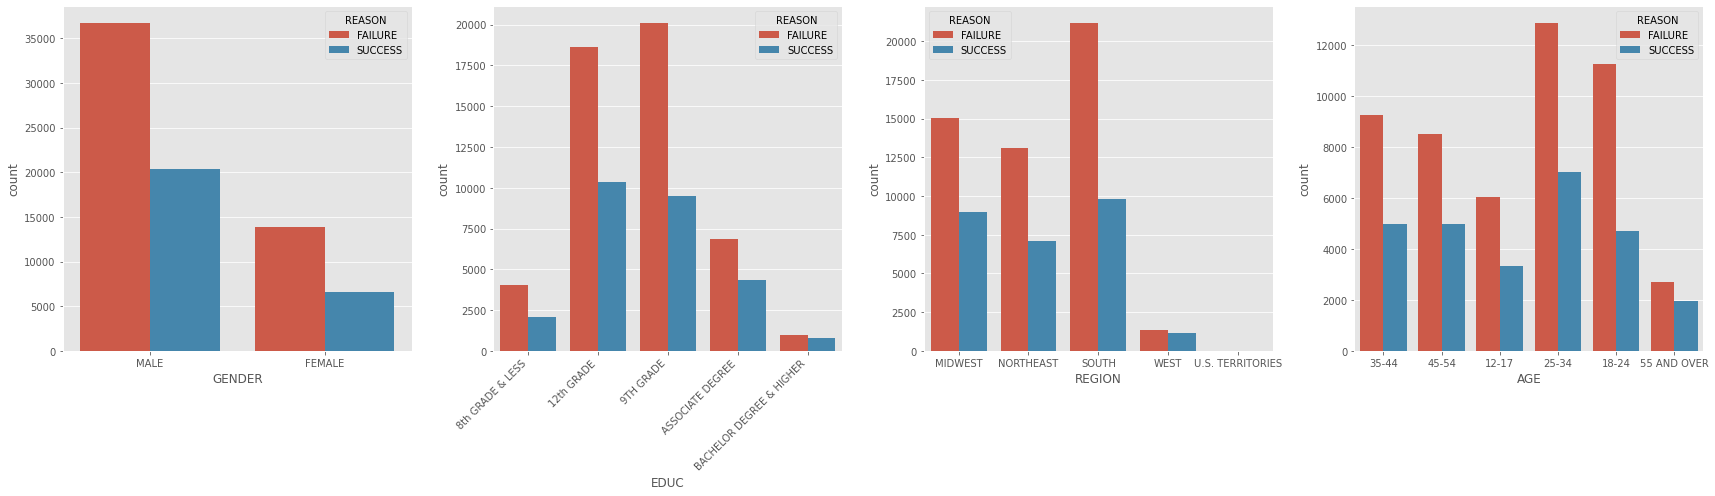

In [4]:
fig, ax = plt.subplots(ncols=4,figsize=(24,7))
sns.countplot(data=final,x='GENDER',hue='REASON',ax=ax[0])
sns.countplot(data=final,x='EDUC',hue='REASON',ax=ax[1])
sns.countplot(data=final,x='REGION',hue='REASON',ax=ax[2])
sns.countplot(data=final,x='AGE',hue='REASON',ax=ax[3])

ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right')
fig.tight_layout()
for index in range(4):
    for labels in ax[index].containers:
        ax[index].bar_label(labels)

AttributeError: ignored

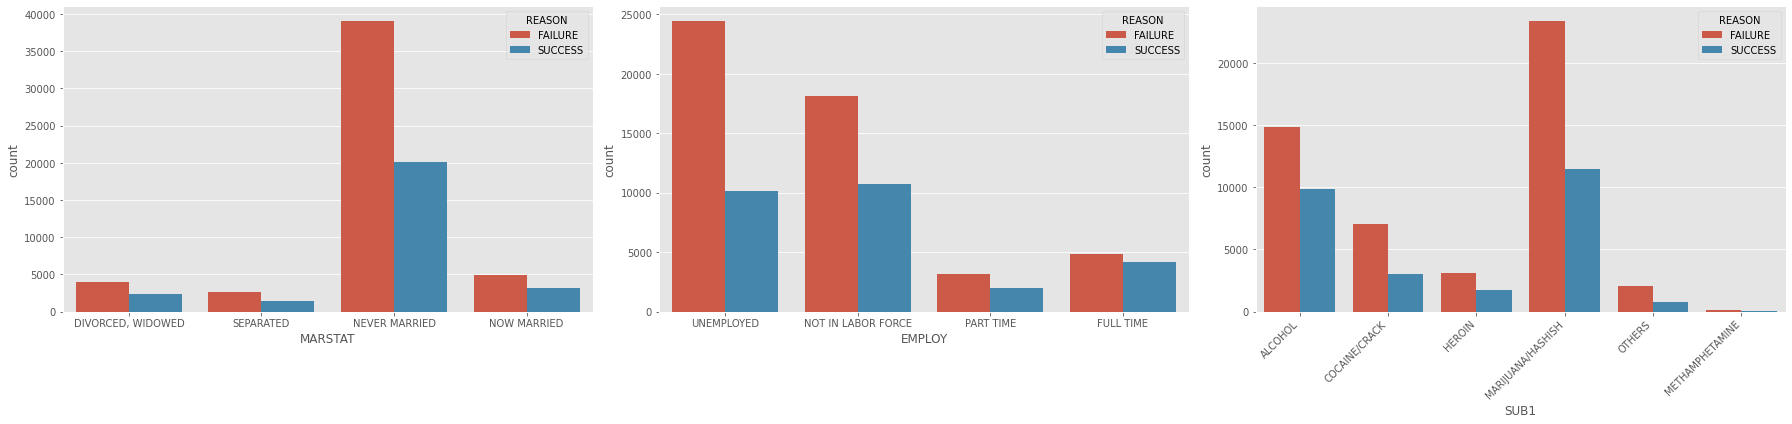

In [5]:
fig, ax = plt.subplots(ncols=3,figsize=(25,6))
sns.countplot(data=final,x='MARSTAT',hue='REASON',ax=ax[0])
sns.countplot(data=final,x='EMPLOY',hue='REASON',ax=ax[1])
sns.countplot(data=final,x='SUB1',hue='REASON',ax=ax[2])

ax[2].set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right')
fig.tight_layout()

for index in range(3):
    for labels in ax[index].containers:
        ax[index].bar_label(labels)

# Preparing the data for machine learning:
* 1) recategorize the categorical columns

In [6]:
mapper = {'AGE': {'12-17':2,'18-24':3, '25-34':4,'35-44':5, '45-54':6,'55 AND OVER':7},
          'EDUC' : {'8th GRADE & LESS':1,'9TH GRADE':2, '12th GRADE':3,  'ASSOCIATE DEGREE':4,'BACHELOR DEGREE & HIGHER':5},
          'ARRESTS' : {'0':0, '1':1, '2 OR MORE':2},
          'REASON' : {'FAILURE':0, 'SUCCESS':1},
          'FREQ1' : {'NOT IN THE PAST MONTH':1, '1-3 TIMES PAST MONTH':2,'3-6 TIMES PAST WEEK':3, '1-2 TIMES PAST WEEK':4,'DAILY':5},
          'FRSTUSE1' :  {'11 AND UNDER':1,'12-17':2,'18-24':3,'25-34':4,'35-44':5, '45-54':6,'55 AND OVER':7}}
los = { '31-45':31,'46-60':32,'61-90':33,'91-120':34,'121-180':35,'121 OR LONGER':36}

In [7]:
columns = ['AGE','SUB1','ALCDRUG','MARSTAT','LIVARAG','EMPLOY','ARRESTS','REGION','VET','METHUSE','EDUC','ROUTE1','FRSTUSE1','LOS','PSOURCE']
ord_cat = ['AGE','EDUC','ARRESTS','REASON','FREQ1','FRSTUSE1']

In [8]:
for columns in ord_cat:
    final[columns] = final[columns].map(mapper[columns])

In [9]:
final['LOS'] = final['LOS'].apply(lambda x: los[x] if x in los.keys() else x).astype('float')

In [10]:
final.head(3)

,AGE,GENDER,MARSTAT,EDUC,EMPLOY,VET,LIVARAG,ARRESTS,REGION,METHUSE,REASON,LOS,PSOURCE,SUB1,ROUTE1,FREQ1,FRSTUSE1,ALCDRUG,PSYPROB
0,5,MALE,"DIVORCED, WIDOWED",1,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,0,32.0,COURT,ALCOHOL,ORAL,5,1,ALCOHOL AND DRUGS,NO
1,6,MALE,"DIVORCED, WIDOWED",3,NOT IN LABOR FORCE,NO,DEPENDENT LIVING,0,MIDWEST,NO,0,31.0,COURT,COCAINE/CRACK,SMOKING,5,4,ALCOHOL AND DRUGS,NO
2,5,MALE,SEPARATED,3,UNEMPLOYED,NO,DEPENDENT LIVING,0,MIDWEST,NO,0,35.0,SELF,HEROIN,INHALATION,5,2,DRUGS,YES


ValueError: ignored

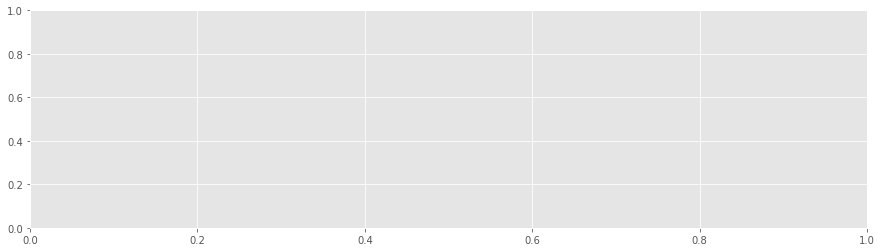

In [11]:
plt.subplots(figsize=(15,4))
sns.boxplot(final[ord_cat])
plt.show()

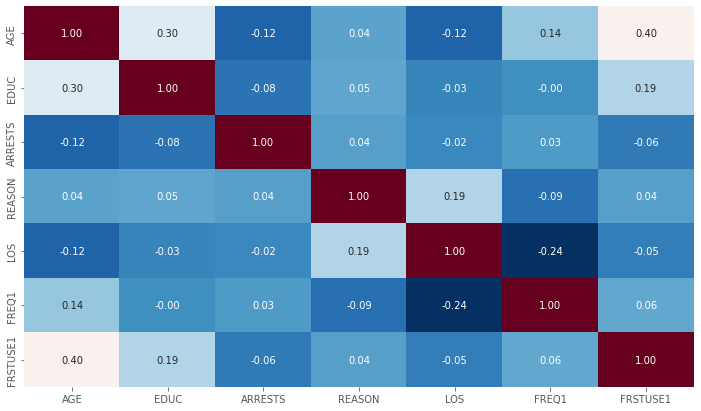

In [12]:
# correlation maxtrix with heatmat
corr = final.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='RdBu_r',cbar=False)  
plt.show()           

In [20]:
transformer = ColumnTransformer(
    transformers=[
        ('onehot',OneHotEncoder(drop='first'),selector(dtype_include=object))],
    remainder='passthrough')

In [15]:
models = {'Logistic Regression':LogisticRegression(random_state=42),
          'GaussianNB':GaussianNB(),
          'XGBClassifier':XGBClassifier(random_state=42),
         'KNeighborsClassifier':KNeighborsClassifier(),
          'RandomForestClassifier':RandomForestClassifier(random_state=42)}

In [16]:
X = final.drop('REASON',axis=1)
y = final['REASON']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle= True)

In [ ]:
score = {}
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for index,model in enumerate(models.keys()):
    pipeline = pipeline = Pipeline(  
        steps=[
            ('transformer', transformer),
            ('model', models[model])])
    # grid = GridSearchCV(pipe,param,cv=5,verbose=1)
    pipeline.fit(X_train, y_train)
    score[model] = pipeline.score(X_test,y_test)
    pred = pipeline.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,labels = pipeline.classes_,colorbar=False,ax=ax[0,index])
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test,ax = ax[1,index])
    ax[0,index].set(title=model)
    fig.tight_layout()

In [33]:
X = final.drop('REASON',axis=1)
y = final['REASON']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle= True)

In [ ]:
score = {}
# fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for index,model in enumerate(models.keys()):
    pipeline = pipeline = Pipeline(  
        steps=[
            ('transformer', transformer),
            ('model', models[model])])
    pipeline.fit(X_train, y_train)
    score[model] = pipeline.score(X_test,y_test)
    pred = pipeline.predict(X_test)
    print(classification_report(y_test,pred))
    ConfusionMatrixDisplay.from_predictions(y_test,pred,labels = pipeline.classes_,colorbar=False,display_labels=['FAILURE','SUCCESS'],cmap='YlGnBu')
    plt.show()
    pred_prob = pipeline.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    area = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--',lw = 2,color='darkorange',label=f"{model} ROC curve (area ={round(area,2)})")
    plt.plot([0,1], [0,1], linestyle='--', color='navy')
    plt.title('ROC Curve: AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc="best")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.savefig(model,dpi=300)
    plt.show();

In [34]:
lr_grid = {'model__C': [100, 10, 1.0, 0.1, 0.01],
                'model__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                'model__penalty' :['l2']}
g_nb_grid = {'model__var_smoothing': np.logspace(0,-9, num=100)}
xg_b_grid = { 'model__n_estimators': [100, 200, 500],
            'model__learning_rate': [0.01,0.05,0.1],
            'model__booster': ['gbtree', 'gblinear'],
            'model__gamma': [0, 0.5, 1],
            'model__reg_alpha': [0, 0.5, 1],
            'model__reg_lambda': [0.5, 1, 5],
            'model__base_score': [0.2, 0.5, 1]}
rf_grid = {"model__n_estimators": np.arange(10, 1000, 50),
           "model__max_depth": [None, 3, 5, 10],
           "model__min_samples_split": np.arange(2, 20, 2),
           "model__min_samples_leaf": np.arange(1, 20, 2)}
params = {'Logistic Regression':lr_grid,'GaussianNB':g_nb_grid,'XGBClassifier':xg_b_grid,'RandomForestClassifier':rf_grid,'KNeighborsClassifier':KNeighborsClassifier()}

In [35]:
grid_score = {}
best_param = {}
for index,model in enumerate(models.keys()):
    pipeline = pipeline = Pipeline(  
        steps=[
            ('transformer', transformer),
            ('model', models[model])])
    grid = RandomizedSearchCV(pipeline,params[model],cv=5,scoring='accuracy',verbose=0,n_jobs=-1,n_iter=20)
    grid.fit(X_train, y_train)
    grid_score[model] = grid.score(X_test,y_test)
    best_param[model] = grid.best_estimator_
    print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    params = grid.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    # ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test,labels = grid.classes_,colorbar=False,ax=ax[0,index])
    # RocCurveDisplay.from_estimator(grid, X_test, y_test,ax = ax[1,index])
    # ax[0,index].set(title=model)
    # fig.tight_layout()

Best: nan using {'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__C': 100}
nan (nan) with: {'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__C': 100}
nan (nan) with: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 100}
nan (nan) with: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 100}
nan (nan) with: {'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__C': 10}
nan (nan) with: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 10}
nan (nan) with: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 10}
nan (nan) with: {'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__C': 1.0}
nan (nan) with: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 1.0}
nan (nan) with: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 1.0}
nan (nan) with: {'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__C': 0.1}
nan (nan) with: {'model__solver': 'lbfgs', 'mod

TypeError: ignored

In [ ]:
feature_names = pipeline[-1].get_feature_names_out()
mdi_importances = pd.Series(model[-1].feature_importances_, index=feature_names).sort_values(ascending=True)

**Creating dummy variables for the categorical features using OneHotEncoder**

In [ ]:
cat_features = ['GENDER','MARSTAT', 'EMPLOY', 'VET','LIVARAG','REGION', 'METHUSE', 'PSOURCE', 'SUB1', 'ROUTE1','ALCDRUG','PSYPROB']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle= True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
# create the instance of OneHotEncoder
onehot = OneHotEncoder(drop='first')

# define the transformer
transformer = ColumnTransformer(
    transformers=[
        ('onehot',onehot,cat_features)]
                                ,remainder='passthrough')
# define the pipeline
pipeline = Pipeline(
    steps=[('transformer', transformer),
           ('model',LogisticRegression())])
pipeline.fit(X_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['GENDER', 'MARSTAT',
                                                   'EMPLOY', 'VET', 'LIVARAG',
                                                   'REGION', 'METHUSE',
                                                   'PSOURCE', 'SUB1', 'ROUTE1',
                                                   'ALCDRUG', 'PSYPROB'])]))])

In [ ]:
X_train_new = pipeline.transform(X_train)
X_test_new = pipeline.transform(X_test)

In [ ]:
# pipeline.named_steps['transformer'].transformers_[0][1].get_feature_names_out(cat_features))
# ['AGE','EDUC','ARRESTS','LOS','FREQ1','FRSTUSE1']

In [ ]:
rf_params = {'max_depth': list(range(1,20,5)),
            'min_samples_leaf': list(range(5,100,10)),
            'criterion': ['gini', 'entropy'] }

lr_params = { 'C' : np.random.uniform(0.1, 20),
             'solver' : ['newton-cg','sag','saga'],
             'max_iter' :list(range(100, 10000))}
dt_params = {
    'criterion': ['gini', 'entropy'], 
    'max_depth': list(range(1,20,5)), 
    'min_samples_split': 2, 
    'min_samples_leaf': 1,
    'ccp_alpha': 0.01,
}
# sm = SMOTE(random_state = 2)

In [ ]:
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
        #   'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Naive Bayes':GaussianNB(),
          'Desicion Tree':DecisionTreeClassifier(),
          'XG-Boost':XGBClassifier()} 

In [ ]:
def train_test_score(models,X_train,X_test,y_train,y_test):
    """ fit and evaluates given machine learning models
    X_train = training data (no labels),X_test = testing data (no labels),y_train = training label,y_test = testing label """
    final_score = {}
    train_dict = {}
    test_dict = {}
    for name , model in models.items():
        fitted = model.fit(X_train,y_train)
        train_score = model.score(X_train,y_train)
        train_dict[name] = round(train_score,2)
        test_score  = model.score(X_test,y_test)
        test_dict[name] = round(test_score,2)
        
    final_score['Train Score'] = train_dict
    final_score['Test Score'] = test_dict
    return final_score

In [ ]:
base = train_test_score(models=models,X_train=X_train_new,X_test=X_test_new,y_train=y_train,y_test=y_test)

In [ ]:
base

{'Train Score': {'Logistic Regression': 0.67,
  'Random Forest': 0.98,
  'Naive Bayes': 0.46,
  'Desicion Tree': 0.98,
  'XG-Boost': 0.77},
 'Test Score': {'Logistic Regression': 0.66,
  'Random Forest': 0.68,
  'Naive Bayes': 0.46,
  'Desicion Tree': 0.61,
  'XG-Boost': 0.71}}

In [ ]:
# fpr, tpr, thresholds = roc_curve(y, pred)
# roc_auc = auc(fpr, tpr)
# display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
# fpr, tpr, thresholds = metrics.roc_curve(y, pred)

In [ ]:
# #SMOTE
#  import pandas as pd
#  import numpy as np
#  new = df = pd.read_csv('/Users/hardey/Desktop/COV Thesis/Data/35074-0001-Data.tsv',sep='\t')
# new.shape
# new.columns
# def put_na(x):
#     if x == -9:
#         return np.nan
#     else:
#         return x
# for col in new.columns:
#     new[col]=new[col].apply(put_na)
# missing = {}
# for col in new.columns:
#     missing[col] = round((new[col].isna().sum()/len(new[col]))*100,2)
# missing_value = pd.DataFrame({'Column':missing.keys(),'Missing %':missing.values()}).sort_values(by='Missing %',ascending=False)
# missing_value.head(10)

# new_copy = new.copy()
# new_copy = new_copy.drop(missing_value[missing_value['Missing %']>20]['Column'].values,axis=1)
# new_copy.head()
# missing_copy = {}
# for col in new_copy.columns:
#     missing_copy[col] = round((new_copy[col].isna().sum()/len(new_copy[col]))*100,2)
# missing_value_copy = pd.DataFrame({'Column':missing_copy.keys(),'Missing %':missing_copy.values()}).sort_values(by='Missing %',ascending=False)
# missing_value_copy.head(10)
# new_copy = new_copy[(new_copy['RACE']==4) & (new_copy['NOPRIOR']==0)]
# new_copy.head()

In [ ]:
# import pandas as pd
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# x = datasets.load_boston().data
# y = datasets.load_boston().target
# columns = datasets.load_boston().feature_names
# df = pd.DataFrame(x,columns=columns)
# df['PRICE'] = y
# df.describe().T

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
sns.countplot(data=final,x='GENDER',hue='REASON',ax=ax[0])
sns.countplot(data=final,x='SUB1',hue='REASON',palette='rainbow',ax=ax[1]).set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='ALCDRUG',hue='REASON',palette='rainbow',ax=ax[2]).set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='MARSTAT',hue='REASON',palette='rainbow',ax=ax[3])
fig.tight_layout()
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
sns.countplot(data=final,x='LIVARAG',hue='REASON',palette='rainbow',ax=ax[0])
sns.countplot(data=final,x='EMPLOY',hue='REASON',palette='rainbow',ax=ax[1])
sns.countplot(data=final,x='ARRESTS',hue='REASON',palette='rainbow',ax=ax[2])
sns.countplot(data=final,x='REGION',hue='REASON',palette='rainbow',ax=ax[3])
fig.tight_layout()
fig, ax = plt.subplots(ncols=4,figsize=(25,5))
sns.countplot(data=final,x='VET',hue='REASON',palette='rainbow',ax=ax[0])
sns.countplot(data=final,x='METHUSE',hue='REASON',palette='rainbow',ax=ax[1])
sns.countplot(data=final,x='EDUC',hue='REASON',palette='rainbow',ax=ax[2]).set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='ROUTE1',hue='REASON',palette='rainbow',ax=ax[3])
fig.tight_layout()
fig, ax = plt.subplots(ncols=3,figsize=(25,5))
sns.countplot(data=final,x='FRSTUSE1',hue='REASON',palette='rainbow',ax=ax[0]).set_xticklabels(ax[0].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='LOS',hue='REASON',palette='rainbow',ax=ax[1]).set_xticklabels(ax[1].get_xticklabels(),rotation=45, ha='right')
sns.countplot(data=final,x='PSOURCE',hue='REASON',palette='rainbow',ax=ax[2]).set_xticklabels(ax[2].get_xticklabels(),rotation=45, ha='right');

In [ ]:


# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)
====

# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
clf = DecisionTreeClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
    random_state=123,
)
=====

# # Import SMOTE
# from imblearn.over_sampling import SMOTE

# # Resample the data
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

# # View the resampled labels
# plot_resample(X_train, y_train, X_res, y_res, "SMOTE
# ======
# # Import RandomOverSampler
# from imblearn.over_sampling import RandomOverSampler

# # Resample the data
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(X_train, y_train)

# # View the resampled labels
# plot_resample(X_train, y_train, X_res, y_res, "Random Over Sampling")

# ======

# def plot_resample(X, y, X_res, y_res, method):    
#     # Create subplots
#     fig, axes = plt.subplot_mosaic([['a', 'b'], ['c', 'd']])
# 	# Generate scatterplots of first two features for inspection
#     sns.scatterplot(X.iloc[y.values == 0, 0], X.iloc[y.values == 0, 1], alpha=0.10, ax=axes['a'])
#     sns.scatterplot(X.iloc[y.values == 1, 0], X.iloc[y.values == 1, 1], alpha=0.10, ax=axes['a'])
#     sns.scatterplot(X_res.iloc[y_res.values == 0, 0], X_res.iloc[y_res.values == 0, 1], alpha=0.10, ax=axes['b'])
#     sns.scatterplot(X_res.iloc[y_res.values == 1, 0], X_res.iloc[y_res.values == 1, 1], alpha=0.10, ax=axes['b'])
#     sns.countplot(y=y, ax=axes['c'])
#     sns.countplot(y=y_res, ax=axes['d'])
#     # Set titles and show plot
#     plt.suptitle(method + ' Outcomes')
#     axes['a'].title.set_text('Original Data')
#     axes['b'].title.set_text(method + ' Data')
#     axes['c'].title.set_text('Original Class Proportions')
#     axes['d'].title.set_text(method + ' Class Proportions')
#     plt.tight_layout()
#     plt.show()

SyntaxError: invalid syntax (1955327521.py, line 3)

In [ ]:
# from sklearn.linear_model import LinearRegression,ElasticNet
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import KFold,train_test_split
# from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

In [ ]:
# from sklearn.datasets import make_regression
# X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
# print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)

Train (500, 100) (500,) Test (500, 100) (500,)


In [ ]:
# # create a list of base-models
# def get_models():
# 	models = list()
# 	models.append(LinearRegression())
# 	models.append(ElasticNet())
# 	models.append(DecisionTreeRegressor())
# 	# models.append(KNeighborsRegressor())
# 	models.append(AdaBoostRegressor())
# 	models.append(BaggingRegressor(n_estimators=10))
# 	models.append(RandomForestRegressor(n_estimators=10))
# 	models.append(ExtraTreesRegressor(n_estimators=10))
# 	return models

In [ ]:
# # collect out of fold predictions form k-fold cross validation
# def get_out_of_fold_predictions(X, y, models):
# 	meta_X, meta_y = list(), list()
# 	# define split of data
# 	kfold = KFold(n_splits=10, shuffle=True)
# 	# enumerate splits
# 	for train_ix, test_ix in kfold.split(X):
# 		print(len(train_ix),len(test_ix))
# 		fold_yhats = list()
# 		# get data
# 		train_X, test_X = X[train_ix], X[test_ix]
# 		train_y, test_y = y[train_ix], y[test_ix]
# 		meta_y.extend(test_y)
# 		# fit and make predictions with each sub-model
# 		for model in models:
# 			model.fit(train_X, train_y)
# 			pred = model.predict(test_X)
# 			# store columns
# 			fold_yhats.append(pred.reshape(len(pred),1))
# 		# store fold yhats as columns
# 		meta_X.append(np.hstack(fold_yhats))
# 	return np.vstack(meta_X), np.asarray(meta_y)

In [ ]:
# # get models
# models = get_models()
# # get out of fold predictions
# meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
# print('Meta ', meta_X.shape, meta_y.shape)

450 50
450 50
450 50
450 50
450 50
450 50
450 50
450 50
450 50
450 50
Meta  (500, 7) (500,)


In [ ]:
# # fit all base models on the training dataset
# def fit_base_models(X, y, models):
# 	for model in models:
# 		model.fit(X, y)

In [ ]:
# # fit a meta model
# def fit_meta_model(X, y):
# 	model = LinearRegression()
# 	model.fit(X, y)
# 	return model

In [ ]:
# def evaluate_models(X, y, models):
# 	for model in models:
# 		yhat = model.predict(X)
# 		mse = mean_squared_error(y, yhat)
# 		print('%s: RMSE %.3f' % (model.__class__.__name__, np.sqrt(mse)))

In [ ]:
# # make predictions with stacked model
# def super_learner_predictions(X, models, meta_model):
# 	meta_X = list()
# 	for model in models:
# 		yhat = model.predict(X)
# 		meta_X.append(yhat.reshape(len(yhat),1))
# 	meta_X = np.hstack(meta_X)
# 	# predict
# 	return meta_model.predict(meta_X)

In [ ]:
# # evaluate meta model
# yhat = super_learner_predictions(X_val, models, meta_model)
# print('Super Learner: RMSE %.3f' % (np.sqrt(mean_squared_error(y_val, yhat))))

NameError: name 'meta_model' is not defined

In [ ]:
# from sklearn.datasets import make_blobs
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from mlens.ensemble import SuperLearner
 
# # create a list of base-models
# def get_models():
# 	models = list()
# 	models.append(LogisticRegression(solver='liblinear'))
# 	models.append(DecisionTreeClassifier())
# 	models.append(SVC(gamma='scale', probability=True))
# 	models.append(GaussianNB())
# 	# models.append(KNeighborsClassifier())
# 	models.append(AdaBoostClassifier())
# 	models.append(BaggingClassifier(n_estimators=10))
# 	models.append(RandomForestClassifier(n_estimators=10))
# 	models.append(ExtraTreesClassifier(n_estimators=10))
# 	return models
 
# # create the super learner
# def get_super_learner(X):
# 	ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
# 	# add base models
# 	models = get_models()
# 	ensemble.add(models)
# 	# add the meta model
# 	ensemble.add_meta(LogisticRegression(solver='lbfgs'))
# 	return ensemble
 
# # create the inputs and outputs
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# # split
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
# print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# # create the super learner
# ensemble = get_super_learner(X)
# # fit the super learner
# ensemble.fit(X, y)
# # summarize base learners
# print(ensemble.data)
# # make predictions on hold out set
# yhat = ensemble.predict(X_val)
# print('Super Learner: %.3f' % (accuracy_score(y_val, yhat) * 100))

[MLENS] backend: threading


Train (500, 100) (500,) Test (500, 100) (500,)
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  adaboostclassifier           0.91     0.02  0.86  0.09  0.03  0.01
layer-1  baggingclassifier            0.84     0.04  0.36  0.02  0.01  0.01
layer-1  decisiontreeclassifier       0.74     0.04  0.06  0.01  0.00  0.00
layer-1  extratreesclassifier         0.82     0.04  0.13  0.02  0.01  0.00
layer-1  gaussiannb                   0.97     0.03  0.01  0.00  0.00  0.00
layer-1  logisticregression           0.96     0.02  0.02  0.00  0.00  0.00
layer-1  randomforestclassifier       0.87     0.04  0.12  0.02  0.01  0.01
layer-1  svc                          0.97     0.03  0.13  0.01  0.01  0.00

Super Learner: 98.200


In [ ]:
from collections import Counter

In [ ]:
# # import lazypredict
# from lazypredict import Supervised
# # .Supervised import LazyClassifier 
# from sklearn.datasets import load_breast_cancer 
# from sklearn.model_selection import train_test_split
# data = load_breast_cancer()
# X = data.data
# y= data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state =123)
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train,X_test, y_train, y_test)
# models

In [ ]:
import random
# One Python function that accepts an input of a character(pegasus or unicorn) when a die is rolled.
def play_game_parallel():
    pegasus = []
    unicorn = []
    build = []
    parts_list = {1: 'Body', 2: 'Tail', 3:'Leg', 4:'Head', 5:'Eye', 6:'Mouth', 7:'Wing', 8:'Horn'}
    total_parts = {'unicorn':11, 'pegasus':12}
    parts_count = {'Body':1, 'Tail':1,'Horn':1,'Mouth':1,'Head':1,'Wing':2,'Eye':2,'Leg':4}
    all_part = list(parts_list.keys())
    count = 0
    count_to_get_body = 0
    count_to_get_head = 0
    while (len(pegasus) != total_parts['pegasus'] and len(unicorn) != total_parts['unicorn']):
        throw = random.choice(all_part)
        print('You rolled the dice')
        count += 1
        if throw in [2,3,4,5,6,7,8] and 1 not in build:
            count_to_get_body += 1
            print(f'You got a/an {parts_list[throw]}, but you need a body first before any other part')
        elif throw in [5,6,7,8] and 4 not in build:
            count_to_get_head += 1
            print(f'You got a/an {parts_list[throw]}, but you need a {parts_list[4]} first')
        elif throw == 1 and build.count(1) == parts_count['Body']:
            print(f'you already have a {parts_list[1]}')
        elif throw == 2 and build.count(2) == parts_count['Tail']:
            print(f'you already have a complete set of {parts_list[2]}')            
        elif throw == 3 and build.count(3) == parts_count['Leg']:
            print(f'you already have a  {parts_list[3]}s')
        elif throw == 4 and build.count(4) == parts_count['Head']:
            print(f'you already have a {parts_list[4]}')
        elif throw == 5 and build.count(5) == parts_count['Eye']:
            print(f'you already have a complete set of {parts_list[5]}')
        elif throw == 6 and build.count(6) == parts_count['Mouth']:
            print(f'you already have a {parts_list[6]}')
        elif throw == 7 and build.count(7) == parts_count['Wing']:
            print(f'you already have a complete set of {parts_list[7]}s')
        elif throw == 8 and build.count(8) == parts_count['Horn']:
            print(f'you already have a {parts_list[8]}')
        else: 
            build.append(throw)
            pegasus.append(throw)
            unicorn.append(throw)
            if throw == 7:
                unicorn.remove(throw)
            if throw == 8:
                pegasus.remove(throw) 
            print(f'body parts collected for unicorn: {unicorn}')
            print(f'body parts collected for pegasus: {pegasus}')
    print(f'you have sucessfully added the body in {count_to_get_body} number of throws')
    print(f'you have sucessfully added the head in {count_to_get_head} number of throws')   
    print(f'you built both creatures in {count} number of throws')
play_game_parallel()


You rolled the dice
You got a/an Leg, but you need a body first before any other part
You rolled the dice
You got a/an Leg, but you need a body first before any other part
You rolled the dice
You got a/an Mouth, but you need a body first before any other part
You rolled the dice
You got a/an Wing, but you need a body first before any other part
You rolled the dice
You got a/an Tail, but you need a body first before any other part
You rolled the dice
You got a/an Leg, but you need a body first before any other part
You rolled the dice
You got a/an Eye, but you need a body first before any other part
You rolled the dice
You got a/an Horn, but you need a body first before any other part
You rolled the dice
You got a/an Wing, but you need a body first before any other part
You rolled the dice
You got a/an Wing, but you need a body first before any other part
You rolled the dice
You got a/an Leg, but you need a body first before any other part
You rolled the dice
You got a/an Leg, but you n